In [ ]:
# 1. Matplotlib - 기본 그래프 도구

# 시각화 도구를 사용하는 이유
# 1. 데이터의 구조와 패턴을 파악하기가 용이하다
# 2. 다양한 관점에서 데이터에 대한 통찰력을 제공한다
# 판다스는 데이터 시각화를 지원하는 내장 기능이 있지만, 풍부한 편이 아니라 다른 시각화 전문 도구를 함께 사용하는 것이 좋음
# 판다스와 함께 파이썬 환경으로 임포트해서 사용함

# Matplotlib은 파이썬 표준 시각화 도구로, 2D 평면 그래프에 대한 다양한 포맷과 기능을 지원함

In [82]:
# 1-1. 선 그래프
# 선 그래프 : 연속하는 데이터 값들을 직선 또는 곡선으로 연결하여 데이터 값 사이의 관계를 나타냄
# 특히 시계열 데이터와 같이 연속적인 값의 변화와 패턴을 파악하는데 적합

import pandas as pd
import matplotlib.pyplot as plt # matplotlib.pyplot 모듈을 약칭 plt로 임포드함

df = pd.read_excel('시도별 전출입 인구수.xlsx', engine = 'openpyxl', header = 0)
print(df)
print('\n')

# '전출지별' 열에 누락 데이터(NaN)이 다수 들어 있음
# 따라서, fillna() 메소드의 method = 'ffill'을 사용하면 누락 데이터가 들어 있는 행의 바로 앞에 위치한 행의 데이터 값으로 채움
# '전출지별'을 전국으로 대체 가능
df = df.fillna(method = 'ffill')
print(df)
print('\n')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop('전출지별', axis = 1) # 행 or 열 삭제
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace = True) # 일부 행 or 열 변경
df_seoul.set_index('전입지', inplace = True)
df_seoul.head(8)

# '전입지'가 '경기도'인 행 데이터 선택
sr_one = df_seoul.loc['경기도'] # 즉, 서울 -> 경기로 이동한 인구 데이터
sr_one.head()

     전출지별     전입지별      1970      1971      1972      1973      1974  \
0    전출지별     전입지별  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1      전국       전국   4046536   4210164   3687938   4860418   5297969   
2     NaN    서울특별시   1742813   1671705   1349333   1831858   2050392   
3     NaN    부산광역시    448577    389797    362202    482061    680984   
4     NaN    대구광역시         -         -         -         -         -   
..    ...      ...       ...       ...       ...       ...       ...   
320   NaN     전라북도       139       202       141       210       219   
321   NaN     전라남도       631       965       857       952      1133   
322   NaN     경상북도       374       619       468       576       625   
323   NaN     경상남도       474       479       440       571      1208   
324   NaN  제주특별자치도      9290     12427     12210     16158     19580   

         1975      1976      1977  ...      2008      2009      2010  \
0    이동자수 (명)  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

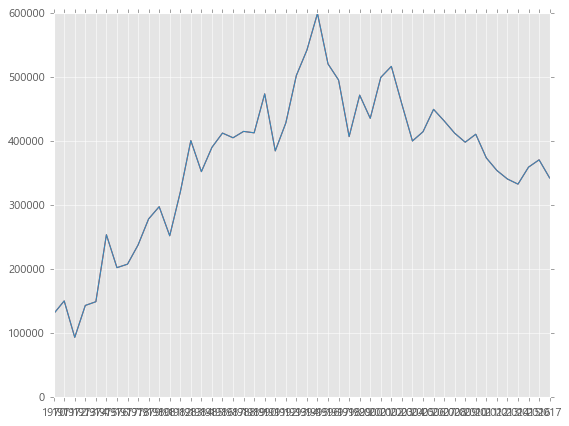

In [83]:
# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 시리즈 또는 데이터프레임 객체를 plot() 함수에 직접 입력하는 것도 가능
plt.plot(sr_one)

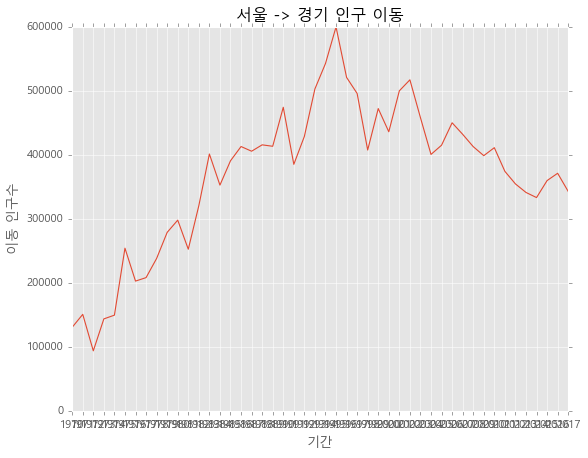

In [84]:
# 차트 제목, 축 이름 추가
# 차트 제목 추가 title() 함수
# x축 이름 xlabel() 함수
# y축 이름 ylabel() 함수

sr_one = df_seoul.loc['경기도']

plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')

plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show() # 변경사항 저장하고 그래프 출력, 한글 깨지는 현상 및 x축 눈금 라벨의 글씨가 서로 겹치는 현상 발생


# Matplotlib 한글 폰트 오류 해결
# Matplotlib을 사용하는 파이썬 프로그램의 앞부분에 한글 폰트를 지정하는 다음의 코드를 추가
from matplotlib import font_manager, rc
font_path = './malgun.ttf' # 폰트 파일 위치
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

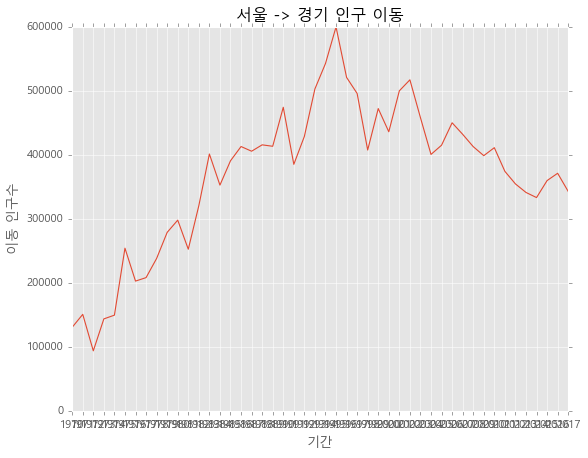

In [106]:
# 한글 폰트 오류까지 해결한 총 코드

import pandas as pd
import matplotlib.pyplot as plt # matplotlib.pyplot 모듈을 약칭 plt로 임포드함

# Matplotlib 한글 폰트 오류 해결
# Matplotlib을 사용하는 파이썬 프로그램의 앞부분에 한글 폰트를 지정하는 다음의 코드를 추가
from matplotlib import font_manager, rc
font_path = './malgun.ttf' # 폰트 파일 위치
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

df = pd.read_excel('시도별 전출입 인구수.xlsx', engine = 'openpyxl', header = 0)

# '전출지별' 열에 누락 데이터(NaN)이 다수 들어 있음
# 따라서, fillna() 메소드의 method = 'ffill'을 사용하면 누락 데이터가 들어 있는 행의 바로 앞에 위치한 행의 데이터 값으로 채움
# '전출지별'을 전국으로 대체 가능
df = df.fillna(method = 'ffill')
print('\n')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop('전출지별', axis = 1) # 행 or 열 삭제
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace = True) # 일부 행 or 열 변경
df_seoul.set_index('전입지', inplace = True)
df_seoul.head(8)

# '전입지'가 '경기도'인 행 데이터 선택
sr_one = df_seoul.loc['경기도'] # 즉, 서울 -> 경기로 이동한 인구 데이터

plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')

plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show() # 변경사항 저장하고 그래프 출력, 한글 깨지는 현상 및 x축 눈금 라벨의 글씨가 서로 겹치는 현상 발생

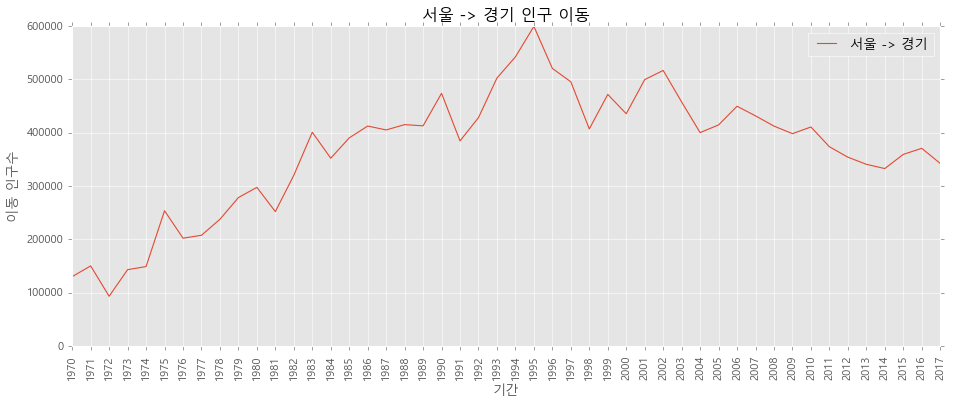

In [86]:
# 그래프 꾸미기

# x축 눈금 라벨의 글씨가 서로 겹쳐 잘 보이지 않는 문제 해결
# 눈금 라벨이 들어갈 만한 충분한 여유 공간이 없어서 발생하는 문제

# 글씨가 들어갈 수 있는 공간 확보 위한 2가지 방법 적용
# 1. 공간을 만들기 위해 figure() 함수로 그림틀의 가로 사이즈를 더 크게 설정
# 2. xticks() 함수를 활용하여 x축 눈금 라벨을 반시계 방향으로 90도 회전하여 글씨가 서로 겹치지 않게 만듦

sr_one = df_seoul.loc['경기도']

plt.figure(figsize = (14, 5)) # 1.그림 사이즈 지정 (가로 14인치, 세로 5인치)
plt.xticks(rotation = 'vertical') # 2. x축 눈금 라벨 각도 조정, 직접 각도를 입력해도 됨

plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.legend(labels = ['서울 -> 경기'], loc = 'best') # 범례 표시, loc = 'best'는 범례를 최적인 곳에 위치하도록 한다

plt.show()

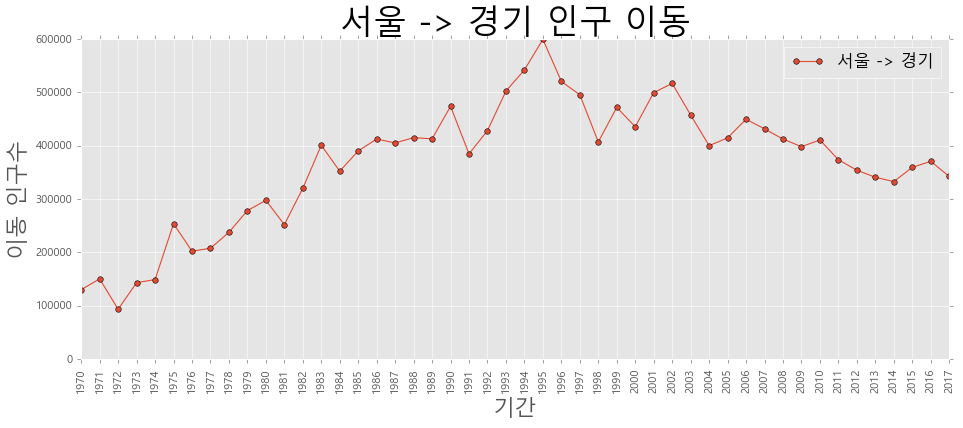

In [87]:
# Matplotlib의 스타일 서식 지정

sr_one = df_seoul.loc['경기도']

plt.style.use('ggplot') # 'ggplot'이라는 스타일 서식 지정

plt.figure(figsize = (14, 5))

plt.xticks(size = 10, rotation = 'vertical') # x축 눈금 라벨 폰트 크기를 10으로 하고, 눈금 각도 반시계 방향으로 90도 회전

plt.plot(sr_one.index, sr_one.values, marker = 'o', markersize = 5) # marker는 원 모양의 점을 찍고, 그 사이즈를 결정

plt.title('서울 -> 경기 인구 이동', size = 30)
plt.xlabel('기간', size = 20)
plt.ylabel('이동 인구수', size = 20)

plt.legend(labels = ['서울 -> 경기'], loc = 'best', fontsize = 15)

plt.show()

In [88]:
# 스타일 서식의 종류
# ggplot 이외에도 많은 종류의 스타일 서식 지원
# 현재 실행환경에서 사용 가능한 Matplotlib의 스타일 옵션 확인

import matplotlib.pyplot as plt

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


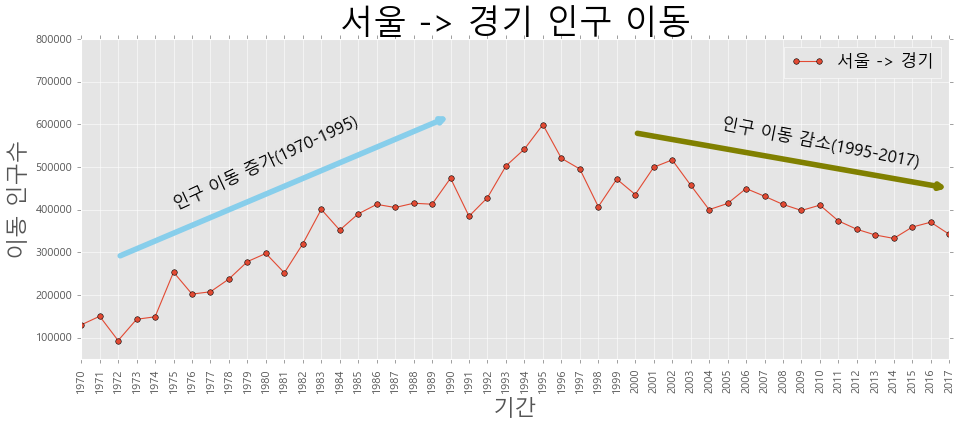

In [89]:
# 그래프에 대한 설명을 덧붙이는 주석 : annotate() 함수 사용
# 주석 내용을 넣을 위치와 정렬 방법 등을 함께 전달함
# arrowprops 옵션 : 텍스트 대신 화살표가 표시됨
# 위치를 나타내는 (x, y) 좌표에서 x값은 인덱스 번호, y값은 숫자값
# (ex) (20, 620000)은 인덱스 번호 20을 x값으로 하고, 6200000명을 y값으로 한다는 뜻임
# rotation 옵션 : 양의 회전 방향은 반시계 방향
# va 옵션 : 글자를 위아래 세로 방향으로 정렬, 'center', 'top', 'bottom', 'baseline'이 있음
# ha 옵션 : 좌우 가로 방향으로 정렬, 'center', 'left', 'right'가 있음

sr_one = df_seoul.loc['경기도']

plt.style.use('ggplot') # 'ggplot'이라는 스타일 서식 지정

plt.figure(figsize = (14, 5))

plt.xticks(size = 10, rotation = 'vertical') # x축 눈금 라벨 폰트 크기를 10으로 하고, 눈금 각도 반시계 방향으로 90도 회전

plt.plot(sr_one.index, sr_one.values, marker = 'o', markersize = 5) # marker는 원 모양의 점을 찍고, 그 사이즈를 결정

plt.title('서울 -> 경기 인구 이동', size = 30)
plt.xlabel('기간', size = 20)
plt.ylabel('이동 인구수', size = 20)

plt.legend(labels = ['서울 -> 경기'], loc = 'best', fontsize = 15)



plt.ylim(50000, 800000) # ylim(최소값, 최대값), 주석 넣을 여백 공간 충분히 확보 위해 ylim 함수 사용

# 주석 표시 - 화살표
plt.annotate('',
             xy = (20, 620000), # 화살표의 끝점
             xytext = (2, 290000), # 화살표의 시작점
             xycoords = 'data', # 좌표체계
             arrowprops = dict(arrowstyle = '->', color = 'skyblue', lw = 5)) # 화살표 서식
             

plt.annotate('',
             xy = (47, 450000), # 화살표의 끝점
             xytext = (30, 580000), # 화살표의 시작점
             xycoords = 'data', # 좌표체계
             arrowprops = dict(arrowstyle = '->', color = 'olive', lw = 5)) # 화살표 서식
            

# 주석 표시 - 텍스트
plt.annotate('인구 이동 증가(1970-1995)', # 텍스트 입력
             xy = (10, 400000), # 텍스트 위치 기준점
             rotation = 25, # 텍스트 회전 각도
             va = 'baseline', # 텍스트 상하 정렬
             ha = 'center', # 텍스트 좌우 정렬
             fontsize = 15) # 텍스트 크기
             

plt.annotate('인구 이동 감소(1995-2017)', # 텍스트 입력
             xy = (40, 500000), # 텍스트 위치 기준점
             rotation = -11, # 텍스트 회전 각도
             va = 'baseline', # 텍스트 상하 정렬
             ha = 'center', # 텍스트 좌우 정렬
             fontsize = 15) # 텍스트 크기


plt.show()

C:\Users\gram\AppData\Local\Temp/ipykernel_20464/760311319.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation = 75)
C:\Users\gram\AppData\Local\Temp/ipykernel_20464/760311319.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation = 75)


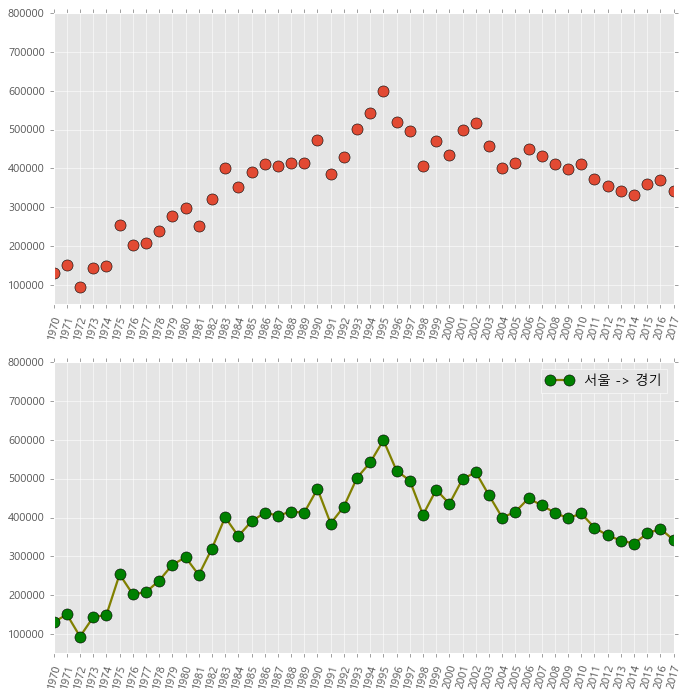

In [90]:
# 화면 분할하여 그래프 여러 개 그리기 - axe 객체 활용
# 화면을 여러 개로 분할하고 분할된 각 화면에 서로 다른 그래프를 그리는 방법
# 여러 개의 axe 객체를 만들고, 분할된 화면마다 axe 객체를 하나씩 배정
# axe 객체는 각각 서로 다른 그래프 표현 가능

# figure() 함수 : 그래프를 그리는 그림틀(fig)를 만듦, figsize 옵션으로 (가로, 세로) 그림틀의 크기를 설정
# add_subplot() : fig 객체에 적용하여 그림틀을 여러 개로 분할, 이 때 나누어진 각 부분을 axe 객체라고 부름, 인자에 행의 크기, 열의 크기, 서브플롯 순서대로 입력
# 각 axe 객체에 plot() 메소드를 적용하여 그래프 출력

fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(2, 1, 1) # 2행 1열의 1번째 순서
ax2 = fig.add_subplot(2, 1, 2) # 2행 1열의 2번째 순서

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(sr_one, 'o', markersize = 10) # 점으로만 표현
ax2.plot(sr_one, marker = 'o', markerfacecolor = 'green', markersize = 10,
         color = 'olive', linewidth = 2, label = '서울 -> 경기') # 점이 찍힌 선으로 표현, label은 범례
ax2.legend(loc = 'best')

# y축 범위 지정 (최소값, 최대값)
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation = 75)
ax2.set_xticklabels(sr_one.index, rotation = 75)

plt.show() # 변경사항 저장하고 그래프 출력

# 'o' : 선 그래프가 아니라 점 그래프로 표현
# marker = 'o' : 마커 모양(ex. 'o', '+', '*', '.')
# markerfacecolor = 'green' : 마커 배경색
# markersize = 10 : 마커 크기
# color = 'olive' : 선의 색
# linewidth = 2 : 선의 두께
# label = '서울 -> 경기' : 라벨 지정

C:\Users\gram\AppData\Local\Temp/ipykernel_20464/811047414.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sr_one.index, rotation = 75)


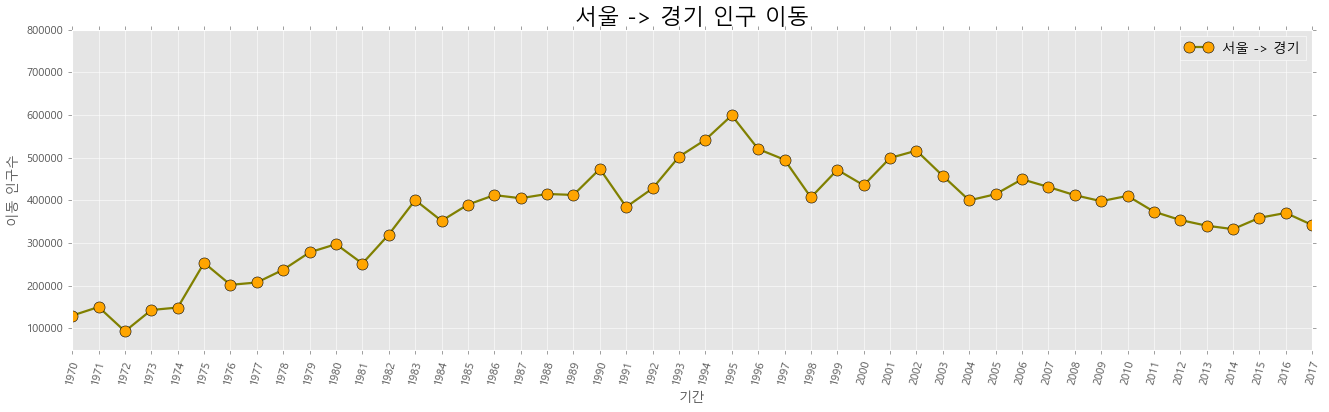

In [91]:
# 제목과 축 이름을 추가
# set_title() : 제목 추가
# set_xlabel() : x축 이름 지정
# set_ylabel() : y축 이름 지정
# tick_params() : 축 눈금 라벨의 크기 조절

fig = plt.figure(figsize = (20, 5))
ax = fig.add_subplot(1, 1, 1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(sr_one, marker = 'o', markerfacecolor = 'orange', markersize = 10,
        color = 'olive', linewidth = 2, label = '서울 -> 경기')
ax.legend(loc = 'best')

# y축 범위 지정(최소값, 최대값)
ax.set_ylim(50000, 800000)

# 차트 제목 추가
ax.set_title('서울 -> 경기 인구 이동', size = 20)

# 축 이름 추가
ax.set_xlabel('기간', size = 12)
ax.set_ylabel('이동 인구수', size = 12)

# 축 눈금 라벨 지정 및 75도 회전
ax.set_xticklabels(sr_one.index, rotation = 75)

# 축 눈금 라벨 크기
ax.tick_params(axis = 'x', labelsize = 10)
ax.tick_params(axis = 'y', labelsize = 10)

plt.show() # 변경사항 저장하고 그래프 출력

C:\Users\gram\AppData\Local\Temp/ipykernel_20464/3403096978.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation = 90)


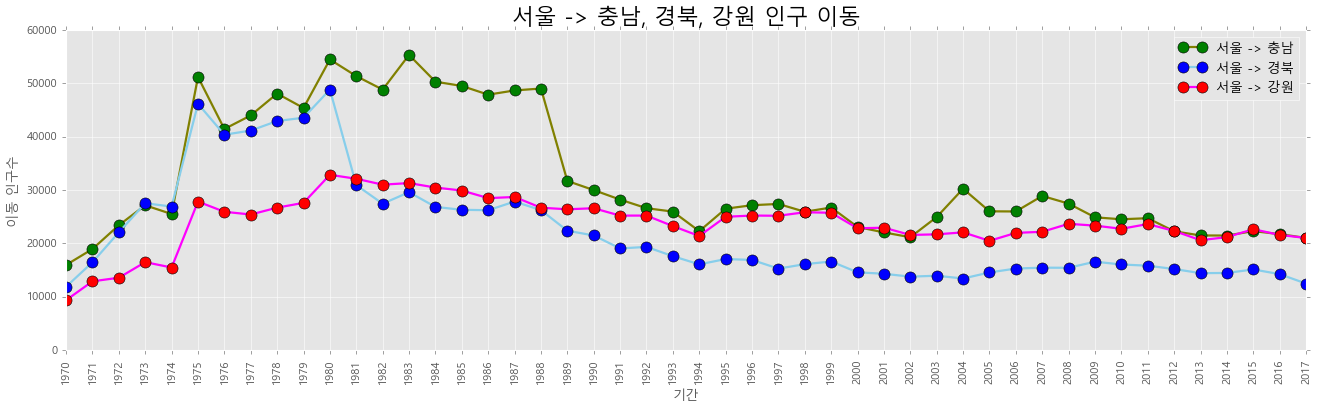

In [92]:
# 동일한 그림(axe 객체)에 여러 개의 그래프 추가
# (ex) 서울특별서에서 충청남도, 경상북도, 강원도로 이동한 인구 변화 그래프 3개를 하나의 같은 화면에 그려봄

col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도', '경상북도', '강원도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성
fig = plt.figure(figsize = (20, 5))
ax = fig.add_subplot(1, 1, 1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(col_years, df_3.loc['충청남도',:], marker = 'o', markerfacecolor = 'green',
        markersize = 10, color = 'olive', linewidth = 2, label = '서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도',:], marker = 'o', markerfacecolor = 'blue',
        markersize = 10, color = 'skyblue', linewidth= 2, label = '서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도',:], marker = 'o', markerfacecolor = 'red',
        markersize = 10, color = 'magenta', linewidth = 2, label = '서울 -> 강원')

# 범례 표시
ax.legend(loc = 'best')

# 차트 제목 추가
ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size = 20)

# 축 이름 추가
ax.set_xlabel('기간', size = 12)
ax.set_ylabel('이동 인구수', size = 12)

# 축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels(col_years, rotation = 90)

# 축 눈금 라벨 크기
ax.tick_params(axis = 'x', labelsize = 10)
ax.tick_params(axis = 'y', labelsize = 10)

plt.show()

# 해석
# 서울에서 서로 다른 3개 지역으로 빠져나간 인구 이동을 비교 파악하기가 쉽다
# 특히 지리적으로 가까운 충남 지역으로 이동한 인구가 다른 두 지역에 비해 많음
# 70~80년대에는 서울에서 지방으로 전출하는 인구가 많았으나, 90년대 이후로는 줄곧 감소하는 패턴을 보임

C:\Users\gram\AppData\Local\Temp/ipykernel_20464/3234234703.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation = 90)
C:\Users\gram\AppData\Local\Temp/ipykernel_20464/3234234703.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years, rotation = 90)
C:\Users\gram\AppData\Local\Temp/ipykernel_20464/3234234703.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years, rotation = 90)
C:\Users\gram\AppData\Local\Temp/ipykernel_20464/3234234703.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years, rotation = 90)


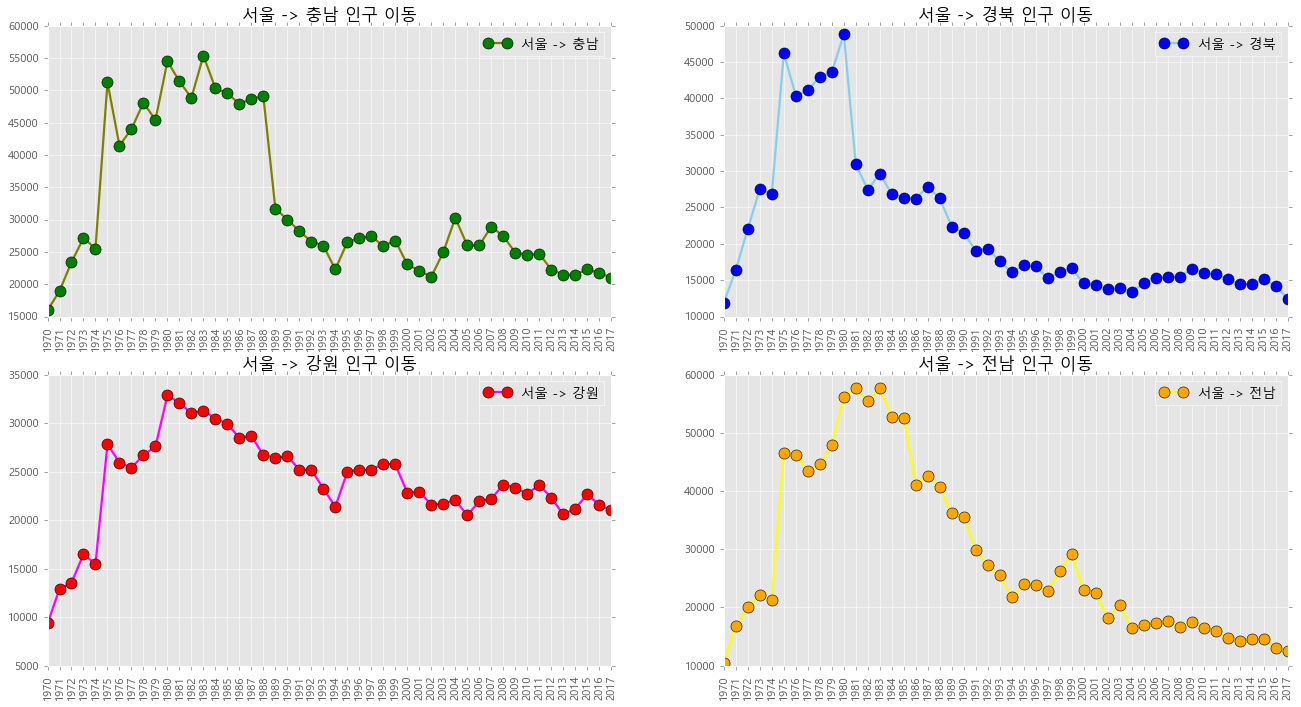

In [93]:
# 서울에서 충청남도, 경상북도, 강원도, 전라남도 4개 지역으로 이동한 인구 변화 그래프 각각 그림
# 4개의 axe 객체를 생성

col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성 (figure에 4개의 서브 플롯 생성)
fig = plt.figure(figsize = (20, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(col_years, df_4.loc['충청남도', :], marker = 'o', markerfacecolor = 'green',
         markersize = 10, color = 'olive', linewidth = 2, label = '서울 -> 충남')
ax2.plot(col_years, df_4.loc['경상북도', :], marker = 'o', markerfacecolor = 'blue',
         markersize = 10, color = 'skyblue', linewidth = 2, label = '서울 -> 경북')
ax3.plot(col_years, df_4.loc['강원도', :], marker = 'o', markerfacecolor = 'red',
         markersize = 10, color = 'magenta', linewidth = 2, label = '서울 -> 강원')
ax4.plot(col_years, df_4.loc['전라남도', :], marker = 'o', markerfacecolor = 'orange',
         markersize = 10, color = 'yellow', linewidth = 2, label = '서울 -> 전남')

# 범례표시
ax1.legend(loc = 'best')
ax2.legend(loc = 'best')
ax3.legend(loc = 'best')
ax4.legend(loc = 'best')

# 차트 제목 추가
ax1.set_title('서울 -> 충남 인구 이동', size = 15)
ax2.set_title('서울 -> 경북 인구 이동', size = 15)
ax3.set_title('서울 -> 강원 인구 이동', size = 15)
ax4.set_title('서울 -> 전남 인구 이동', size = 15)

# 축 눈금 라벨 지정 및 90도 회전
ax1.set_xticklabels(col_years, rotation = 90)
ax2.set_xticklabels(col_years, rotation = 90)
ax3.set_xticklabels(col_years, rotation = 90)
ax4.set_xticklabels(col_years, rotation = 90)

plt.show()

In [94]:
# Matplotlib에서 사용할 수 있는 색의 종류
# Matplotlib 라이브러리를 사용할 때 색상을 지정하는 경우가 있음
# 이럴 때 사용할 수 있는 색상의 종류를 확인할 수 있다면 매우 유용

import matplotlib

# 컬러 정보 담을 빈 딕셔너리 생성
colors = {}

# 컬러 이름과 헥사코드 확인하여 딕셔너리에 입력
for name, hex in matplotlib.colors.cnames.items():
    colors[name] = hex # 딕셔너리 값 추가
    
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

In [95]:
# 1-2. 면적 그래프
# 면적 그래프는 각 열의 데이터를 선 그래프로 구현하는데, 선 그래프와 x축 사이의 공간에 색이 입혀짐
# 색의 투명도(alpha)는 기본값 0.5로 투과되어 보임
# 선 그래프를 그리는 plot() 메소드에 kind = 'area' 옵션을 추가하면 간단하게 그릴 수 있음
# 그래프 누적 여부 설정 : stacked = Ture (기본값)
# => 누적 시 각 열의 패턴과 함께 열 전체의 합계가 어떻게 변하는지 파악 가능
# 따라서, 면적 그래프를 선 그래프를 확장한 개념으로 누적 선 그래프라고 누르기도 함
# stacked = False 옵션을 지정하면 각 열의 선 그래프들이 누적되지 않고 서로 겹치도록 표시됨, 즉 동일한 화면에 여러 개를 그린 것과 같은 결과

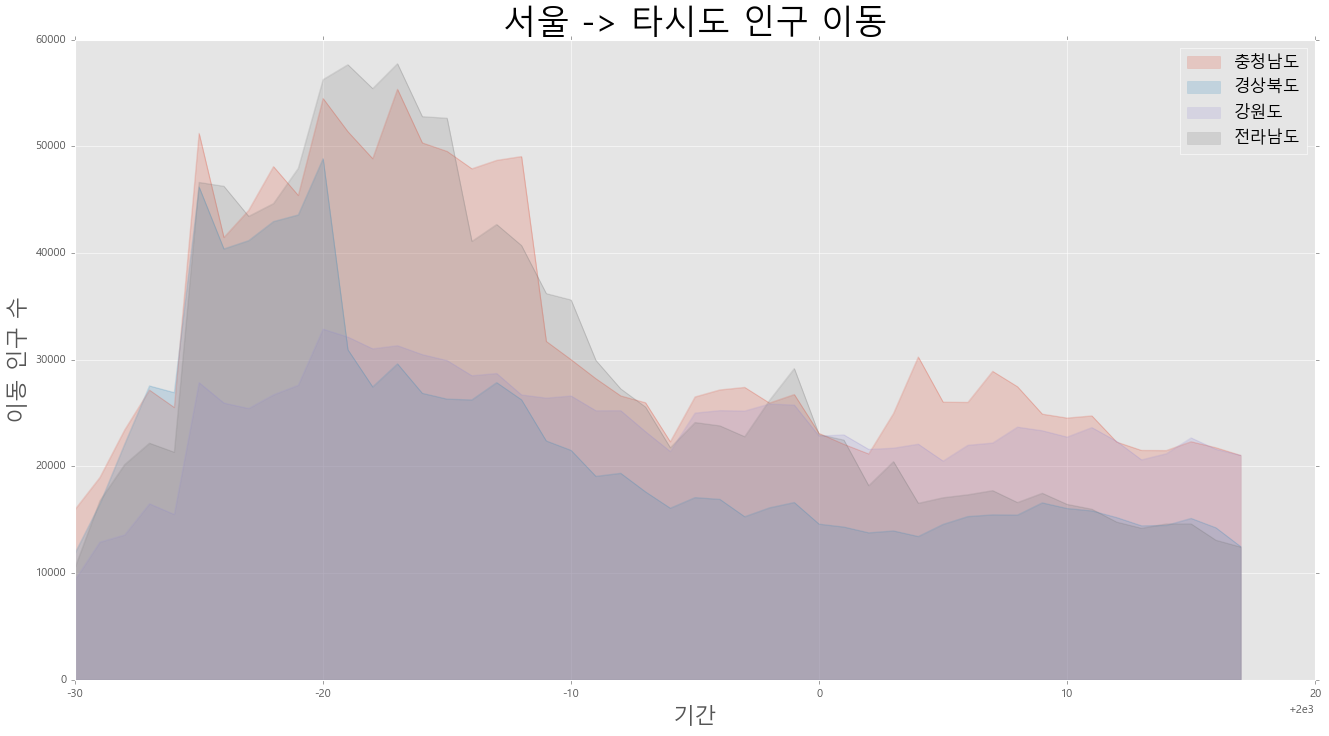

In [107]:
# 면적 그래프(stacked = False) 그리기

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1) # 열 '전출지별'을 삭제함
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace = True)
df_seoul.set_index('전입지', inplace = True)

# 서울에서 '충청남도', '경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind = 'area', stacked = False, alpha = 0.2, figsize = (20, 10))

plt.title('서울 -> 타시도 인구 이동', size = 30)
plt.ylabel('이동 인구 수', size = 20)
plt.xlabel('기간', size = 20)
plt.legend(loc = 'best', fontsize = 15)

plt.show()

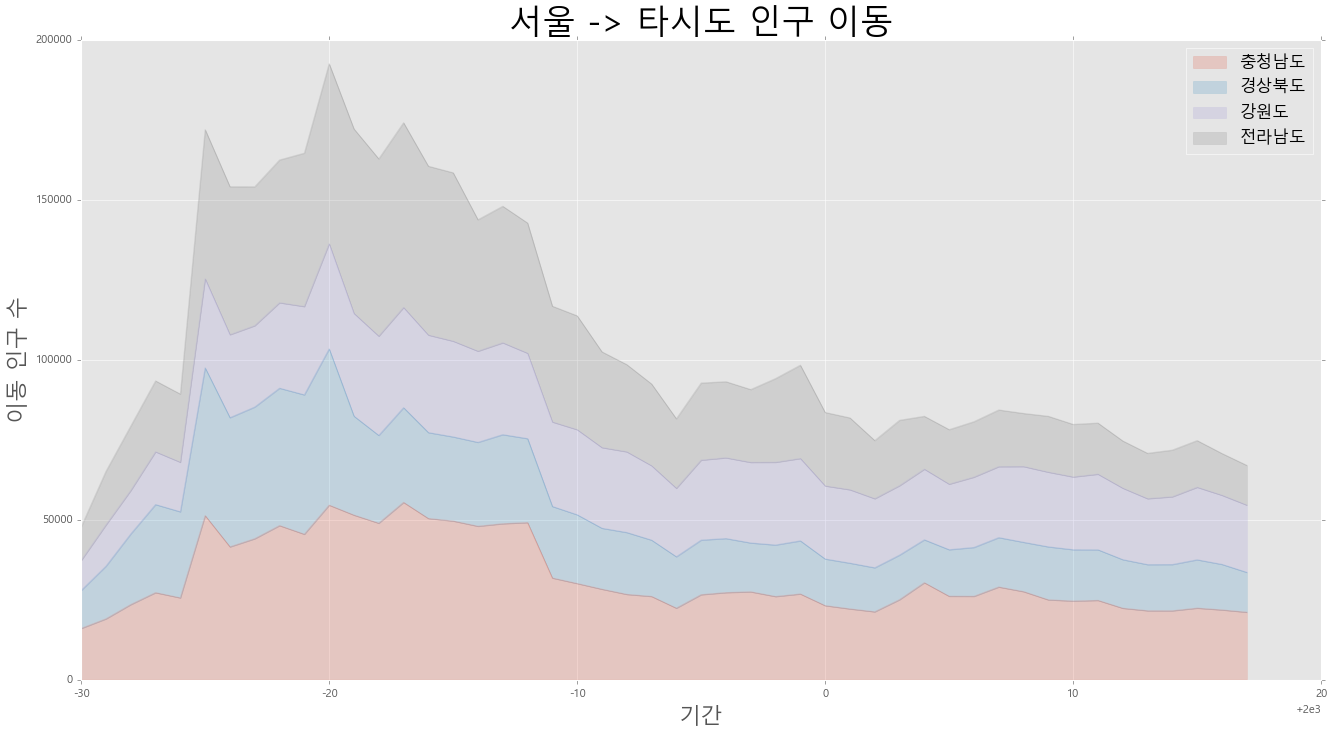

In [108]:
# 면적 그래프 (stacked = True) 그리기

df_4.index = df_4.index.map(int)

df_4.plot(kind = 'area', stacked = True, alpha = 0.2, figsize = (20, 10))

plt.title('서울 -> 타시도 인구 이동', size = 30)
plt.ylabel('이동 인구 수', size = 20)
plt.xlabel('기간', size = 20)
plt.legend(loc = 'best', fontsize = 15)

plt.show()

<class 'matplotlib.axes._subplots.AxesSubplot'>


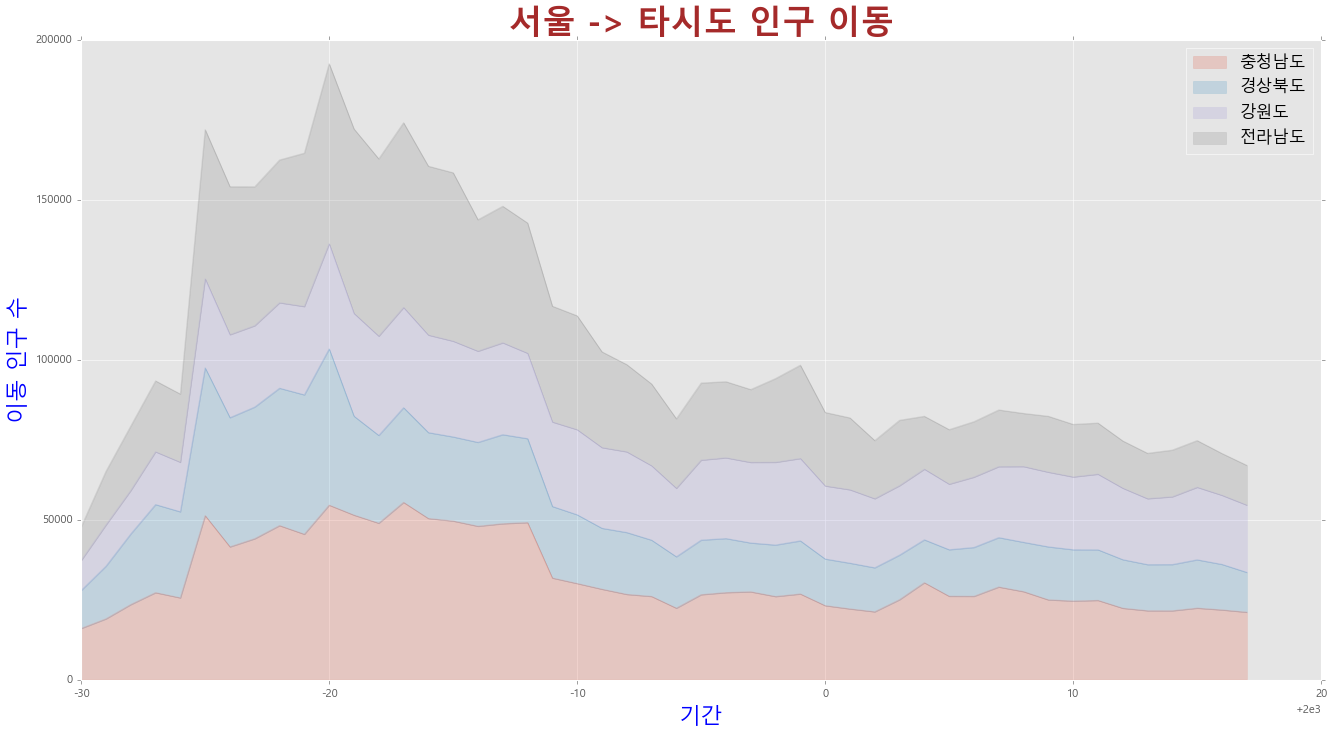

In [110]:
# 앞에서 plot() 메소드로 생성한 그래프는 axe 객체이고, axe 객체의 세부적인 요소 설정 가능
# 즉, axe 객체의 속성을 이용하여 제목, 축, 이름 등을 설정

df_4.index = df_4.index.map(int)

# 면적 그래프 axe 객체 생성
ax = df_4.plot(kind = 'area', stacked = True, alpha = 0.2, figsize = (20, 10))
print(type(ax))

# axe 객체 설정 변경
ax.set_title('서울 -> 타시도 인구 이동', size = 30, color = 'brown', weight = 'bold')
ax.set_ylabel('이동 인구 수', size = 20, color = 'blue')
ax.set_xlabel('기간', size = 20, color = 'blue')
ax.legend(loc = 'best', fontsize = 15)

plt.show()

In [114]:
# 1-3. 막대 그래프
# 막대 그래프(bar plot)는 데이터 값의 크기에 비례하여 높이를 갖는 직사각형 막대로 표현
# 막대 높이의 상대적 길이 차이를 통해 값이 크고 작음을 설명
# 세로형과 가로형 막대 그래프 두 종류가 있음
# 다만, 세로형의 경우 정보 제공 측면에서 보면 선 그래프와 큰 차이 없음

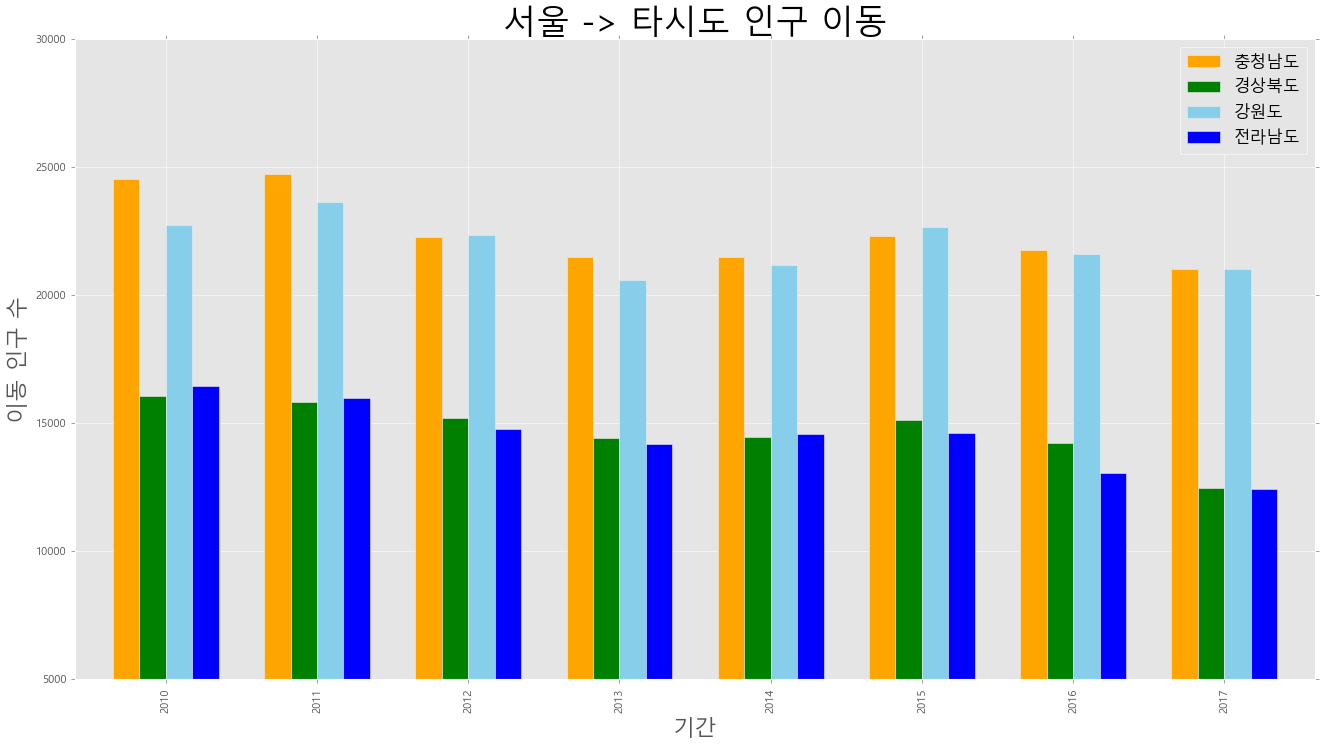

In [115]:
# 세로형 막대 그래프는 시계열 데이터를 표현하는데 적합
# plot() 메소드에 kind = 'bar' 옵션을 입력

col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경
df_4.index = df_4.index.map(int)

# 막대 그래프 그리기
df_4.plot(kind = 'bar', figsize = (20, 10), width = 0.7, # width 옵션은 막대 너비
          color = ['orange', 'green', 'skyblue', 'blue']) # color 옵션을 이용해 막대 색상을 다르게 설정

plt.title('서울 -> 타시도 인구 이동', size = 30)
plt.ylabel('이동 인구 수', size = 20)
plt.xlabel('기간', size = 20)
plt.ylim(5000, 30000)
plt.legend(loc = 'best', fontsize = 15)

plt.show()

       2010   2011   2012   2013   2014   2015   2016   2017        합계
전입지                                                                   
충청남도  24522  24723  22269  21486  21473  22299  21741  21020  179533.0
경상북도  16042  15818  15191  14420  14456  15113  14236  12464  117740.0
강원도   22736  23624  22332  20601  21173  22659  21590  21016  175731.0
전라남도  16429  15974  14765  14187  14591  14598  13065  12426  116035.0


Text(0.5, 0, '이동 인구 수')

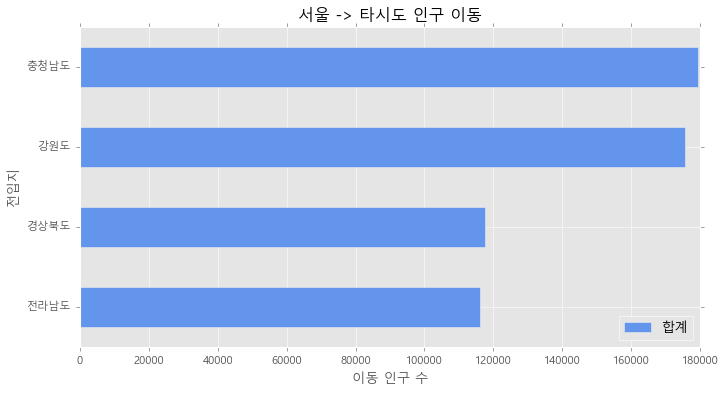

In [117]:
# 가로형 막대 그래프는 각 변수 사이 값의 차이를 설명하는데 적합
# plot() 메소드의 옵션으로 kind = 'barh'을 입력
# 2010 ~ 2017년의 기간동안 서울에서 각 시도로 이동한 인구의 합계를 구하여 시도별로 비교하는 그래프

col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]

# 2010-2017년 이동 인구 수를 합계하여 새로운 열로 추가
df_4['합계'] = df_4.sum(axis = 1)
print(df_4)

# 가장 큰 값부터 정렬
# DataFrame 객체.sort_index() : 인덱스 기준으로 정렬
# DataFrame 객체.sort_values(by = '') : 특정 열을 기준으로 정렬
df_total = df_4[['합계']].sort_values(by = '합계', ascending = True)

# 스타일 서식 지정
plt.style.use('ggplot')

# 수평 막대 그래프 그리기
df_total.plot(kind = 'barh', color = 'cornflowerblue', width = 0.5, figsize = (10, 5))

plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

C:\Users\gram\AppData\Local\Temp/ipykernel_20464/1102814793.py:26: FutureWarning: convert_float is deprecated and will be removed in a future version
  df = pd.read_excel('./남북한발전전력량.xlsx', engine = 'openpyxl', convert_float = True)


  전력량 (억㎾h) 발전 전력별 1990 1991 1992 1993 1994 1995 1996 1997  ... 2007 2008  \
5        북한     합계  277  263  247  221  231  230  213  193  ...  236  255   
6       NaN     수력  156  150  142  133  138  142  125  107  ...  133  141   
7       NaN     화력  121  113  105   88   93   88   88   86  ...  103  114   
8       NaN    원자력    -    -    -    -    -    -    -    -  ...    -    -   

  2009 2010 2011 2012 2013 2014 2015 2016  
5  235  237  211  215  221  216  190  239  
6  125  134  132  135  139  130  100  128  
7  110  103   79   80   82   86   90  111  
8    -    -    -    -    -    -    -    -  

[4 rows x 29 columns]


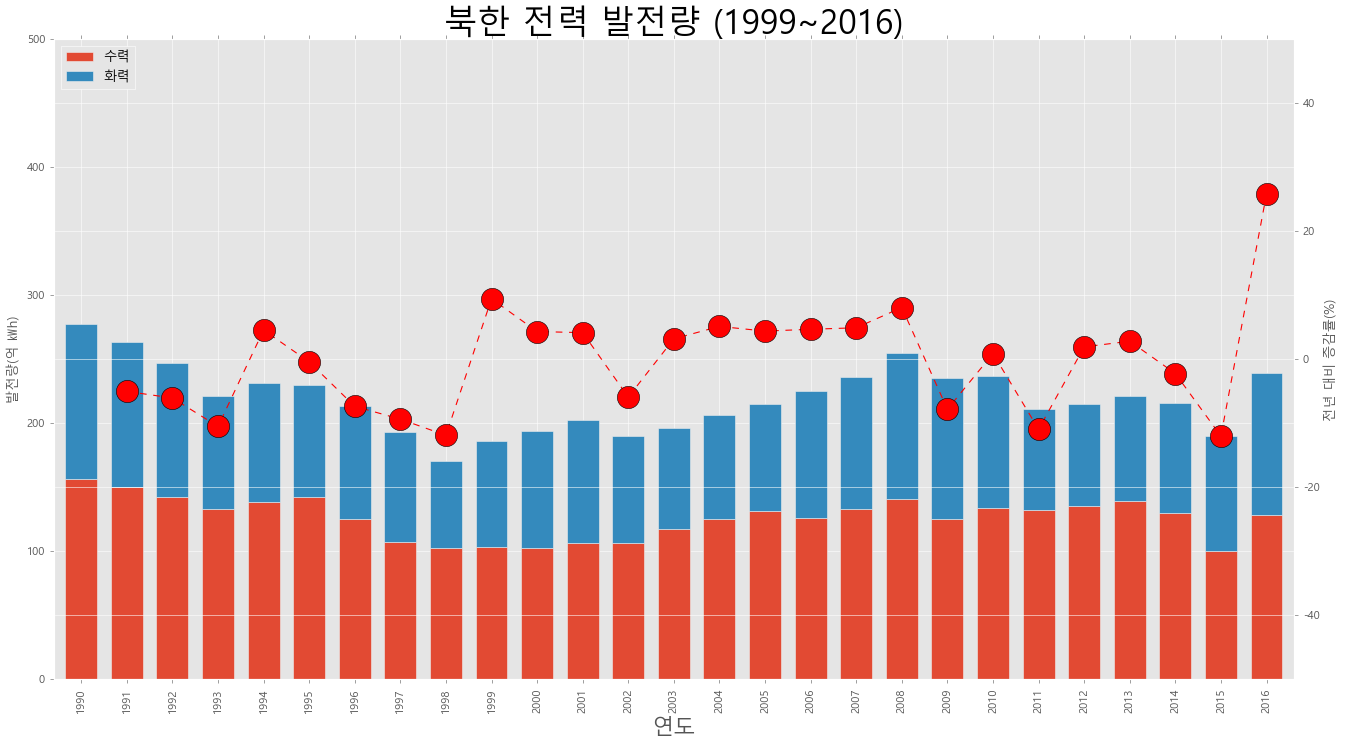

In [129]:
# 보조 축 활용하기 (2축 그래프 그리기)
# 2개의 y축을 갖는 그래프를 그릴 수 있음
# 기존 축에는 막대 그래프의 값을 표시하고 보조 축에는 선 그래프의 값을 표시
# 막대 그래프는 연도별 북한의 발전량을 나타내고, 선 그래프는 북한 발전량의 전년 대비 중감률을 백분률로 나타냄
# 증감률 계산 위해 rename() 메소드로 '합계' 열의 이름을 '총발전량'으로 바꿈
# shift() 메소드를 이용하여 '총발전량' 열의 데이터를 1행씩 뒤로 이동시켜서 '총발전량 - 1년' 열을 새로 생성
# 위 두 열의 데이터를 이용하여 전년도 대비 변동율을 계산한 결과를 '증감률' 열에 저장
# stacked = True 옵션을 지정하여, '수력', '화력' 열의 값을 쌓은 세로형 막대 그래프를 그림
# ax1 객체에 twinx() 메소드를 적용하여 ax1 객체의 쌍둥이 객체를 만들고, ax2 변수에 저장
# ax2 객체를 이용하여 증감률에 해당하는 그래프를 그린다

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt 

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = './malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

plt.style.use('ggplot') # 스타일 서식 지정
plt.rcParams['axes.unicode_minus'] # 마이너스 부호 출력 설정

# Excel 데이터를 데이터프레임으로 변환
df = pd.read_excel('./남북한발전전력량.xlsx', engine = 'openpyxl', convert_float = True)
df = df.loc[5:9] # 북한 데이터만 가져옴
print(df)
df.drop('전력량 (억㎾h)', axis = 'columns', inplace = True)
df.set_index('발전 전력별', inplace = True)
df = df.T

# 증감률(변동률) 계산
df = df.rename(columns = {'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1) # 총 발전량 열의 값인 행이 하나씩 밀리는 열을 만듦
df['증감률'] = (df['총발전량'] / df['총발전량 - 1년'] - 1) * 100

# 2축 그래프 그리기
ax1 = df[['수력', '화력']].plot(kind = 'bar', figsize = (20, 10), width = 0.7, stacked = True)
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감률, ls = '--', marker = 'o', markersize = 20,
         color = 'red', label = '전년대비 증감률(%)')

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size = 20)
ax1.set_ylabel('발전량(억 ㎾h)')
ax2.set_ylabel('전년 대비 증감률(%)')

plt.title('북한 전력 발전량 (1999~2016)', size = 30)
ax1.legend(loc = 'upper left')

plt.show()

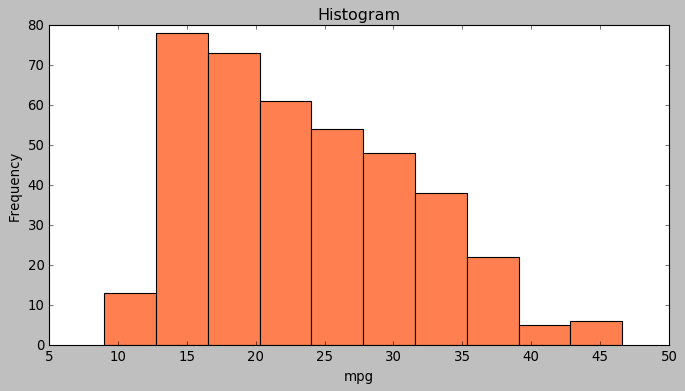

In [131]:
# 1-4. 히스토그램
# 히스토그램은 변수가 하나인 단변수 데이터의 빈도수를 그래프로 표현
# 따라서 단변수 데이터를 미리 추출하고 plot() 메서드를 적용
# x축을 같은 크기의 여러 구간으로 나누고 각 구간에 속하는 데이터 값의 개수(빈도)를 y축에 표시

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('classic') # 스타일 서식 지정

df = pd.read_csv('./auto-mpg.csv', header = None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name'] # 데이터프레임 열 이름 지정 시 df.columns 이용

df['mpg'].plot(kind = 'hist', bins = 10, color = 'coral', figsize = (10, 5))

plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

# 해석
# 자동차 연비 값은 대부분 좌측으로 편향되어 있어서 연비가 낮은 구간에 집중되어 있는 경향을 보임

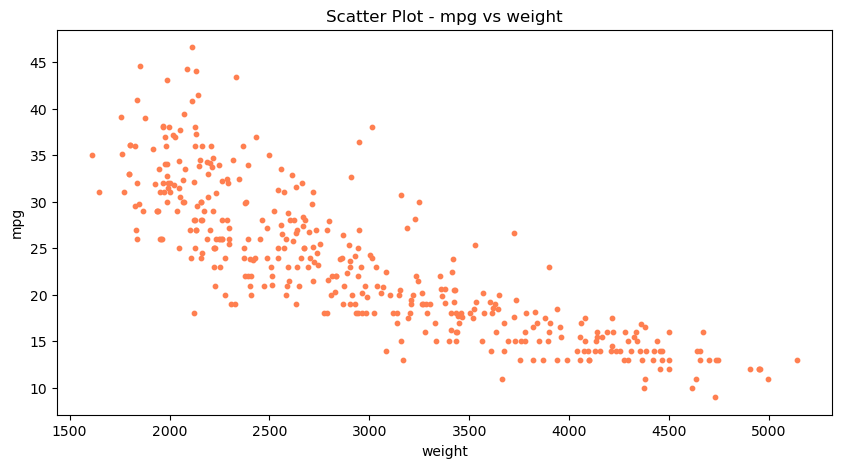

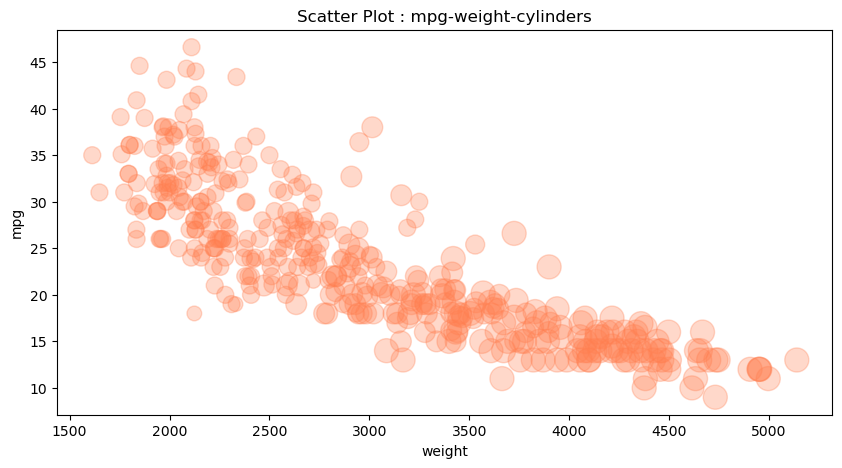

In [135]:
# 1-5. 산점도
# 서로 다른 두 변수 사이의 관계를 나타냄
# 각 변수는 연속되는 값을 가짐 (일반적으로 정수형 혹은 실수형)
# plot() 메소드 kind = 'scatter' 옵션을 사용하여 산점도를 그림
# x, y축의 옵션을 각각 지정
# c 옵션 : 점의 색상
# s 옵션 : 점의 크기

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

df = pd.read_csv('./auto-mpg.csv', header = None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name'] 

df.plot(x = 'weight', y = 'mpg', kind = 'scatter', c = 'coral', s = 10, figsize = (10, 5))
plt.title('Scatter Plot - mpg vs weight')
plt.show()


# 새로운 변수를 추가해 점의 크기 또는 색상으로 표현 가능
# 3번째 변수로 cylinders 열을 추가해 봄
# 해당 열의 최대값 대비 상대적 크기를 나타내는 비율을 계산하여 cylinders_size 변수에 저장
# 따라서, 해당 변수는 0 ~ 1 범위의 실수 값의 배열이 됨
# 점의 크기를 정하는 s 옵션에 cylinders_size를 입력하여 값의 크기에 따라 점의 크기를 다르게 표시
# 버블 차트 : 점의 크기에 변화를 주면 모양이 비눗방울 같아서 이렇게 부름

cylinders_size = df.cylinders / df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기
df.plot(kind = 'scatter', x = 'weight', y = 'mpg', c = 'coral', figsize = (10, 5),
        s = cylinders_size, alpha = 0.3)
plt.title('Scatter Plot : mpg-weight-cylinders')
plt.show()

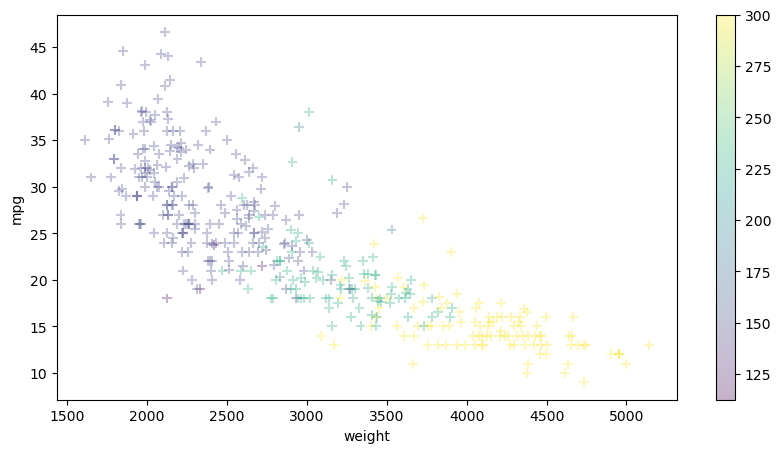

In [136]:
# 그래프를 그림 파일로 저장
# Matplotlib 라이브러리로 생성한 그래프를 그림 파일로 저장하는 방법
# savefig() 함수에 저장하려는 파일의 이름과 파일 경로를 설정함
# transparent = True 옵션으로 그림 배경을 투명하게 지정하여 별도 저장
# c 옵션에 cylinders_size을 할당하여 값에 따라 다른 색상으로 표현
# 색상을 정하는 컬러맵으로 viridis 옵션 사용

cylinders_size = df.cylinders / df.cylinders.max() * 300

df.plot(kind = 'scatter', x = 'weight', y = 'mpg', marker = '+', figsize = (10, 5),
        cmap = 'viridis', c = cylinders_size, s = 50, alpha = 0.3)

plt.savefig('./scatter.png')
plt.savefig('./scatter_transparent.png', transparent = True)

plt.show()

           mpg  cylinders  displacement    weight  acceleration  model year  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


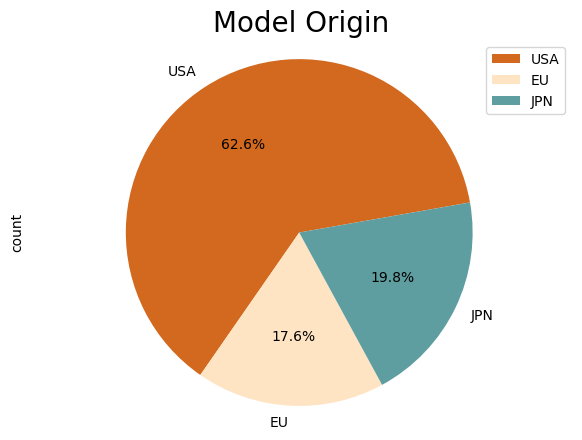

In [140]:
# 1-6. 파이 차트
# 원을 파이 조각처럼 나누어서 표현
# 조각의 크기는 해당 변수에 속하는 데이터 값의 크기에 비례
# plot() 메소드에 kind = 'pie' 옵션을 사용

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

df = pd.read_csv('./auto-mpg.csv', header = None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name'] 

# 데이터 개수 카운트 위해 값 1을 가진 열 추가
df['count'] = 1
df_origin = df.groupby('origin').sum() # origin 열을 기준으로 그룹화, 합계 연산
print(df_origin.head())

df_origin.index = ['USA', 'EU', 'JPN']

# 제조국가(origin) 열에 대한 파이 차트 그리기 - count 열 데이터 사용
df_origin['count'].plot(kind = 'pie',
                        figsize = (7, 5),
                        autopct = '%1.1f%%', # 퍼센트 표시
                        startangle = 10, # 파이 조각을 나누는 시작점 (각도 표시)
                        colors = ['chocolate', 'bisque', 'cadetblue']) 

plt.title('Model Origin', size = 20)
plt.axis('equal') # 파이 차트의 비율을 같게(원에 가깝게 조정)
plt.legend(labels = df_origin.index, loc = 'upper right') # 범례 표시
plt.show()

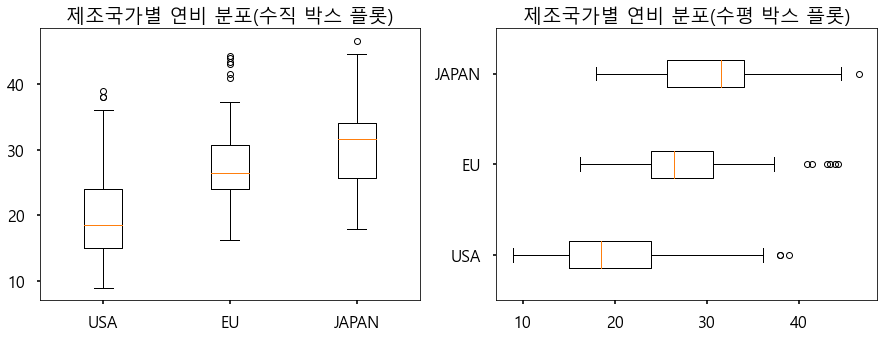

In [3]:
# 1-7. 박스 플롯
# 범주형 데이터의 분포를 파악하는데 적합
# 5개의 통계 지표(최소값, 1분위값, 중간값, 3분위값, 최대값)을 제공
# 제조국가별 연비 분포를 보여주는 박스플롯 
# 수평 박스 플롯을 그리기 위해서는 옵션 vert = False 추가해줌

import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_path = './malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

plt.style.use('seaborn-poster')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정

df = pd.read_csv('./auto-mpg.csv', header = None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name'] 

# 그래프 객체 설정
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# axe 객체에 boxplot 메소드로 그래프 출력
ax1.boxplot(x = [df[df['origin'] == 1]['mpg'], # x 옵션에 박스플롯에 넣을 열 3개를 리스트에 담아서 x 옵션에 할당함
                 df[df['origin'] == 2]['mpg'],
                 df[df['origin'] == 3]['mpg']],
            labels = ['USA', 'EU', 'JAPAN']) # 수직 박스 플롯

ax2.boxplot(x = [df[df['origin'] == 1]['mpg'],
                 df[df['origin'] == 2]['mpg'],
                 df[df['origin'] == 3]['mpg']],
            labels = ['USA', 'EU', 'JAPAN'],
            vert = False) # 수평 박스 플롯

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()

In [ ]:
# 2. Seaborn 라이브러리 - 고급 그래프 도구
# Seaborn은 Matplotlib의 기능과 스타일을 확장한 파이썬 시각화 도구의 고급 버전
# 주로 sns라는 약칭을 사용함

In [2]:
# 데이터셋 가져오기

import seaborn as sns

titanic = sns.load_dataset('titanic') # 타이타닉 데이터셋 가져오기

print(titanic.head())
print('\n')
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

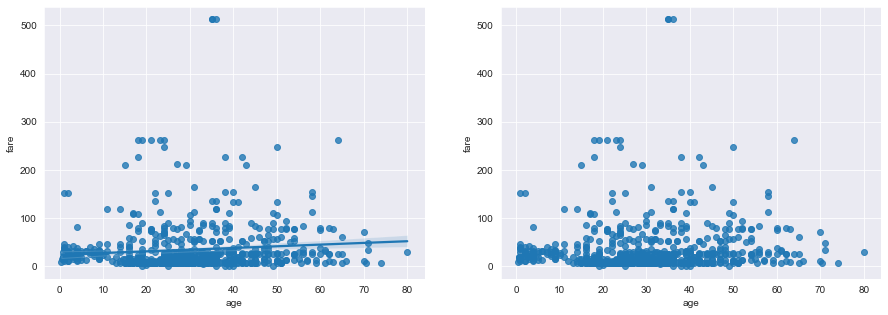

In [3]:
# 회귀선이 있는 산점도
# regplot() 함수는 서로 다른 2개의 연속 변수 사이의 산점도를 그리고 선형회귀분석에 의한 회귀선을 함께 나타냄
# fig_reg = False 옵션을 설정하면 회귀선을 안 보이게 할 수 있음

import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

# 스타일 테마 설정 (5가지 : darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성 (figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 그래프 그리기 - 선형회귀선 표시 (fig_reg = True)
sns.regplot(x = 'age', # x축 변수
            y = 'fare', # y축 변수
            data = titanic, # 데이터
            ax = ax1) # axe 객체 - 1번째 그래프

# 그래프 그리기 - 선형회귀선 미표시 (fig_reg = False)
sns.regplot(x = 'age',
            y = 'fare', 
            data = titanic,
            ax = ax2,
            fit_reg = False)

plt.show()

C:\Users\gram\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


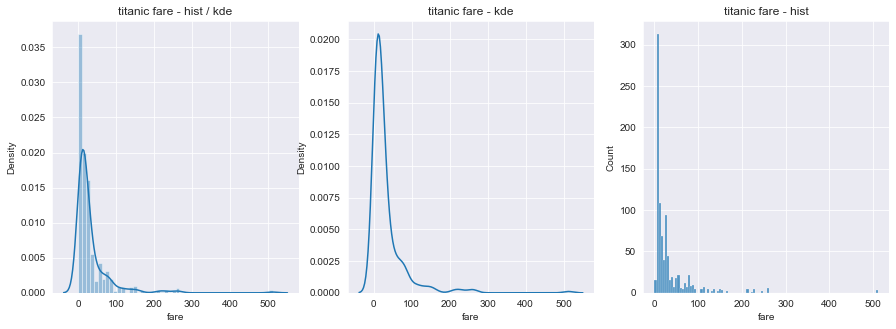

In [4]:
# 히스토그램 / 커널 밀도 그래프
# 단변수 데이터의 분포를 확인할 때 distplot() 함수를 이용
# 기본값으로 히스토그램과 커널 밀도 함수(그래프와 x축 사이의 면적이 1이 되도록 그리는 밀도 분포 함수)를 그래프로 출력
# hist = False 옵션 추가 시 히스토그램이 미표시, kde = False 옵션 추가 시 커널 밀도 그래프 미표시
# 밀도 그래프는 kdeplot(), 히스토그램은 histplot() 함수 사용 가능

fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# distplot (히스토그램 + 커널 밀도 그래프)
sns.distplot(titanic['fare'], ax = ax1)
 
# kdeplot (커널 밀도 그래프)
sns.kdeplot(x = 'fare', data = titanic, ax = ax2)

# histplot (히스토그램)
sns.histplot(x = 'fare', data = titanic, ax = ax3)

# 차트 제목 표시
ax1.set_title('titanic fare - hist / kde')
ax2.set_title('titanic fare - kde')
ax3.set_title('titanic fare - hist')

plt.show()

# 결과 해석
# 타이타닉의 운임의 분포를 그려보면 대부분 100달러 미만에 집중되어 있음

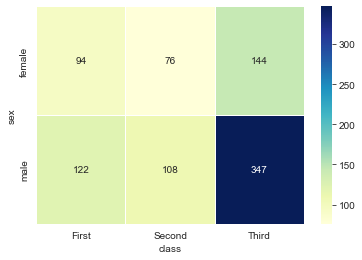

In [5]:
# 히트맵
# heatmap() 메소드
# 2개의 범주형 변수를 x축, y축에 놓고 데이터를 매트릭스 형태로 분류
# 데이터프레임을 피벗테이블로 정리할 때 한 변수를 행 인덱스로 나머지 변수를 열 이름으로 설정
# aggfunc = 'size' 옵션은 데이터 값의 크기를 기준으로 집계함을 의미
# cbar = True 옵션을 사용하면 컬러 바가 표시됨

# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table(index = ['sex'], columns = ['class'], aggfunc = 'size')

# 히트맵 그리기
sns.heatmap(table,
            annot = True, fmt = 'd', # 데이터값 표시 여부, 정수형 포맷
            cmap = 'YlGnBu', # 컬러맵
            linewidth =.5, # 구분선
            cbar = True) # 컬러바 표시 여부

plt.show()

C:\Users\gram\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


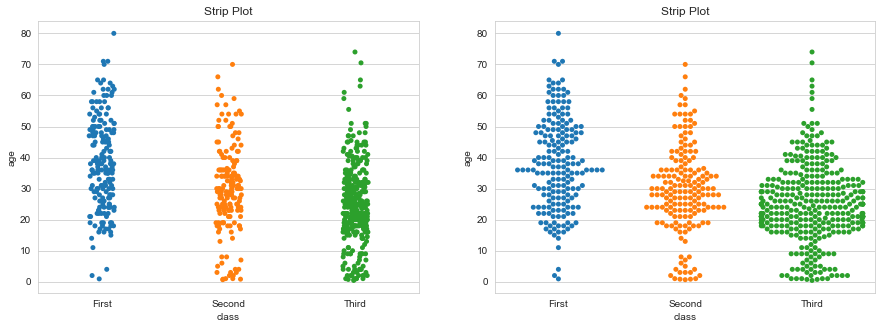

In [6]:
# 범주형 데이터의 산점도
# 범주형 변수에 들어 있는 각 범주별 데이터의 분포를 확인
# stripplot() 함수, swarmplot() 함수 사용
# swarmplot() 함수는 데이터의 분산까지 고려하여, 데이터 포인트가 서로 중복되지 않도록 그림 -> 데이터가 퍼진 정도를 입체적으로 확인
# hue = 'sex' 옵션을 함수에 추가한다면, sex 열의 데이터 값인 남녀 성별을 색상으로 구분하여 출력함

import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

# 스타일 테마 설정
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 데이터 분산 미고려 (중복 표시 o)
sns.stripplot(x = 'class',
              y = 'age',
              data = titanic,
              ax = ax1)

# 데이터 분산 고려 (중복 표시 x)
sns.swarmplot(x = 'class',
              y = 'age',
              data = titanic,
              ax = ax2)

ax1.set_title('Strip Plot')
ax2.set_title('Strip Plot')

plt.show()

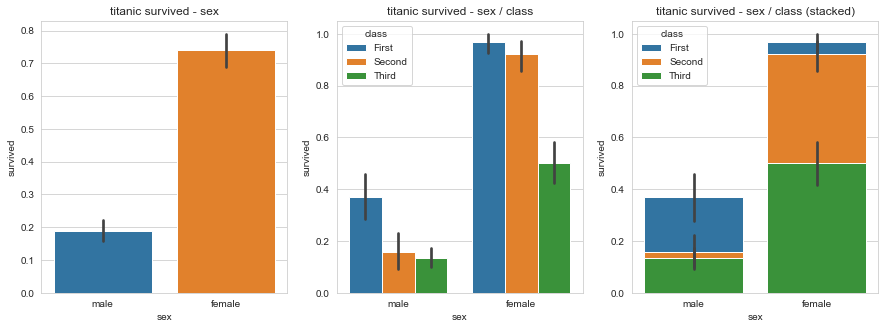

In [7]:
# 막대 그래프
# 막대 그래프를 그리는 barplot() 함수
# 3개의 axe 객체(서브 플롯)을 만들고, 옵션에 변화를 주며 차이를 살펴봄
# x, y축에 변수 할당 / x, y축에 변수 할당 + hue 옵션 추가 / x, y축 변수 할당 + hue 옵션 추가 + 누적 출력 순으로 실행

fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# 1. x, y축에 변수 할당
sns.barplot(x = 'sex', y = 'survived', data = titanic, ax = ax1)

# 2. x, y축에 변수 할당 + hue 옵션 추가
sns.barplot(x = 'sex', y = 'survived', hue = 'class', data = titanic, ax = ax2)

# 3. x, y축에 변수 할당 + hue 옵션 추가 + 누적 출력
sns.barplot(x = 'sex', y = 'survived', hue = 'class', dodge = False, data = titanic, ax = ax3) # dodge = False로 하면 누적 출력

# 차트 제목 표시
ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex / class')
ax3.set_title('titanic survived - sex / class (stacked)')

plt.show()

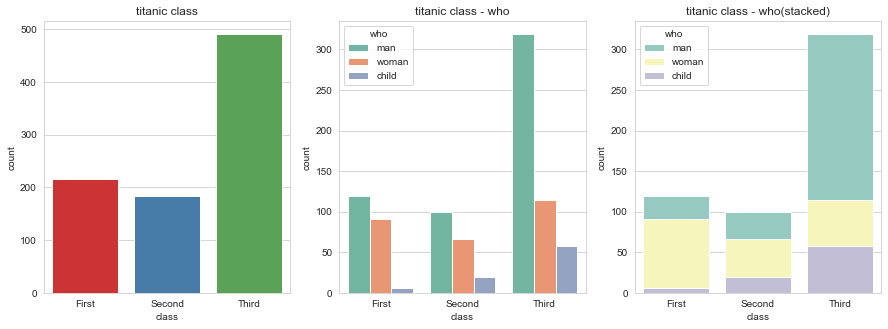

In [9]:
# 빈도 그래프
# 각 범주에 속하는 데이터의 개수를 막대 그래프로 나타내는 countplot()
# 위와 같이 3개의 옵션으로 달리 출력
# 그래프 색 구성을 다르게 하려면 palette 옵션을 변경하여 적용

fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# 1. 기본값
sns.countplot(x = 'class', palette = 'Set1', data = titanic, ax = ax1)

# 2. hue 옵션에 'who' 추가
sns.countplot(x = 'class', hue = 'who', palette = 'Set2', data = titanic, ax = ax2)

# 3. dodge = False 옵션 추가 (축 방향으로 분리하지 않고 누적 그래프 출력)
sns.countplot(x = 'class', hue = 'who', palette = 'Set3', dodge = False, data = titanic, ax = ax3)

# 차트 제목 표시
ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()

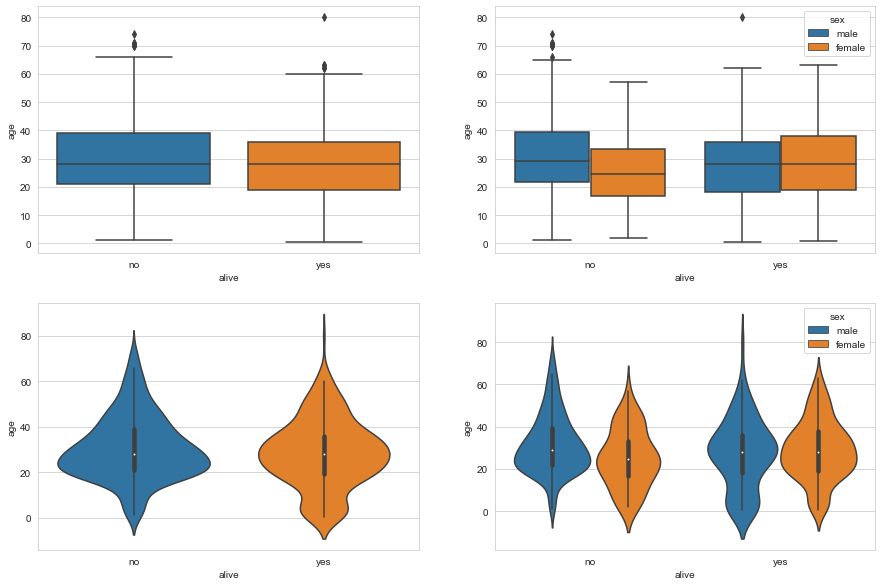

In [10]:
# 박스 플롯 / 바이올린 그래프
# 박스 플롯은 범주형 데이터 분포와 주요 통계 지표 함께 제공
# 그러나, 박스 플롯만으로는 데이터의 분산의 정도를 정확하게 알기 어려워 커널 밀도 함수 그래프를 y축 방향에 추가하여 바이올린 그래프 그림
# 박스 플롯 : boxplot() / 바이올린 그래프 : violinplot()

import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

# 스타일 테마 설정
sns.set_style('whitegrid')

# 그래프 객체 생성
fig = plt.figure(figsize = (15, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# 박스 플롯 - 기본값
sns.boxplot(x = 'alive', y = 'age', data = titanic, ax = ax1)

# 박스 플롯 - hue 변수 추가
sns.boxplot(x = 'alive', y = 'age', hue = 'sex', data = titanic, ax = ax2)

# 바이올린 그래프 - 기본값
sns.violinplot(x = 'alive', y = 'age', data = titanic, ax = ax3)

# 바이올린 그래프 - hue 변수 추가
sns.violinplot(x = 'alive', y = 'age', hue = 'sex', data = titanic, ax = ax4)

plt.show()

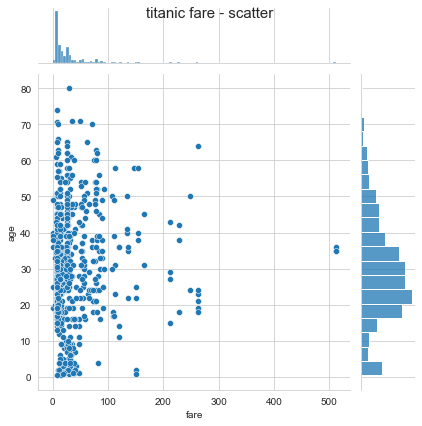

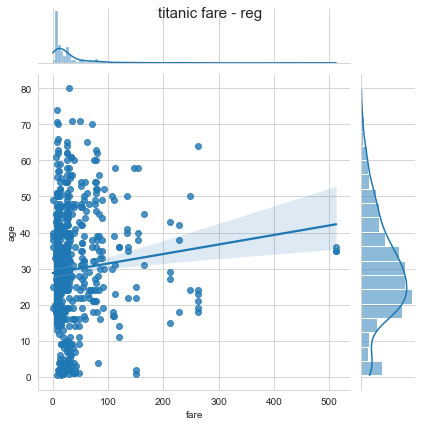

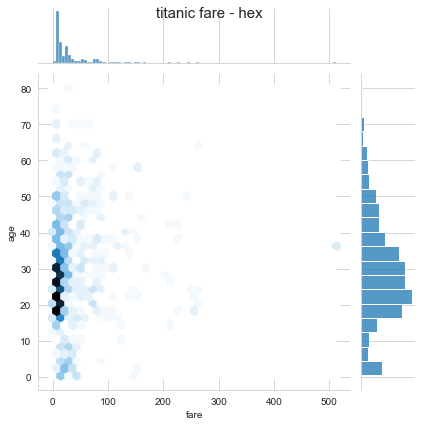

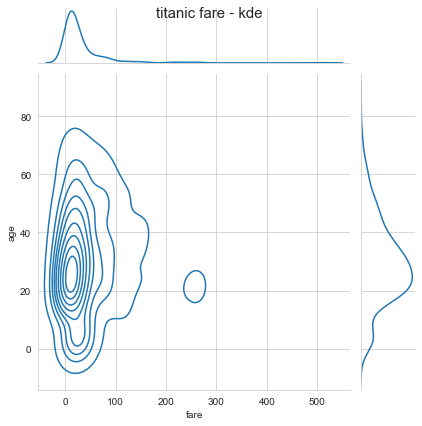

In [11]:
# 조인트 그래프
# jointplot() 함수는 산점도를 기본으로 표시하고, x-y축에 각 변수에 대한 히스토그램을 동시에 보여줌
# 따라서, 두 변수의 관계와 데이터가 분산되어 있는 정도를 한눈에 파악하기 좋음
# 기본값 / 회귀선 추가(kind = 'reg') / 육각 산점도(kind = 'hex') / 커널 밀집 그래프(kind = 'kde') 순으로 조인트 그래프 그림

import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

sns.set_style('whitegrid')

# 1. 조인트 그래프 - 산점도(기본값)
j1 = sns.jointplot(x = 'fare', y = 'age', data = titanic)

# 2. 조인트 그래프 - 회귀선
j2 = sns.jointplot(x = 'fare', y = 'age', kind = 'reg', data = titanic)

# 3. 조인트 그래프 - 육각 그래프
j3 = sns.jointplot(x = 'fare', y = 'age', kind = 'hex', data = titanic)

# 4. 조인트 그래프 - 커널 밀집 그래프 
j4 = sns.jointplot(x = 'fare', y = 'age', kind = 'kde', data = titanic)

# 차트 제목 표시
j1.fig.suptitle('titanic fare - scatter', size = 15)
j2.fig.suptitle('titanic fare - reg', size = 15)
j3.fig.suptitle('titanic fare - hex', size = 15)
j4.fig.suptitle('titanic fare - kde', size = 15)

plt.show()

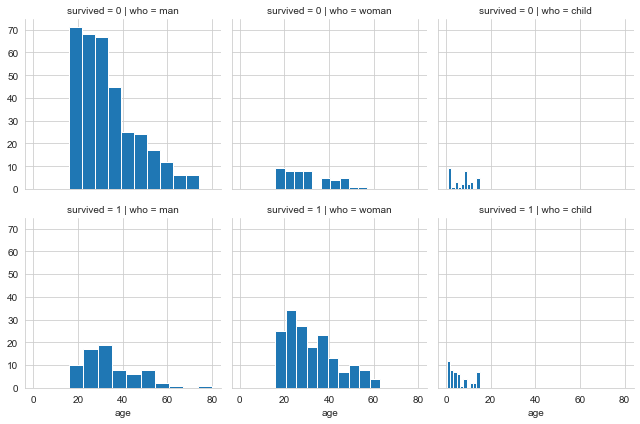

In [12]:
# 조건을 적용하여 화면을 그리드로 분할하기
# FacetGrid() 함수는 행, 열 방향으로 서로 다른 조건을 적용하여 여러 개의 서브 플롯을 만듦
# 그리고, 각 서브플롯에 적용할 그래프 종류를 map() 메소드를 이용하여 그리드 객체에 전달

# 열 방향으로는 'who', 행 방향으로는 'survived'로 하여 2 x 3 모양의 그리드를 만듦
# 각 조건에 맞는 탑승객을 구분하여, 'age'를 기준으로 히스토그램을 그림

import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

# 스타일 테마 설정
sns.set_style('whitegrid')

# 조건에 따라 그리드 나누기
g = sns.FacetGrid(data = titanic, col = 'who', row = 'survived')

# 그래프 적용하기
g = g.map(plt.hist, 'age')

# 해석
# 남성에 비해 여성 생존자가 상대적으로 많은 편이고, 성인 중에서는 활동성이 좋은 20~40대 생존자가 많음

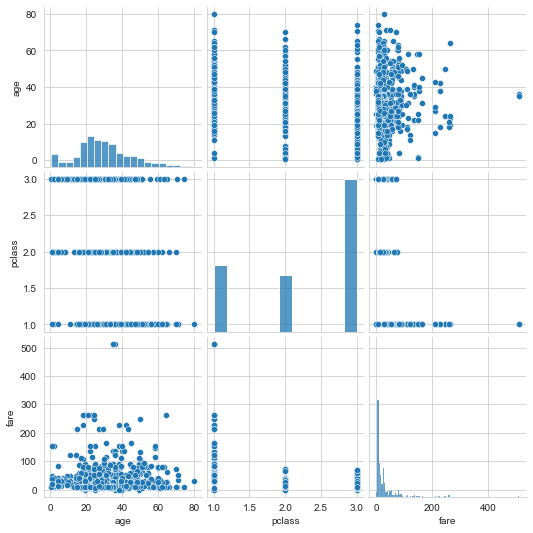

In [13]:
# 이변수 데이터의 분포
# pairplot() 함수는 인자로 전달되는 데이터프레임의 열을 두 개씩 짝 지을 수 있는 모든 조합에 대해 표현
# 짝의 개수만큼 화면을 그리드로 나눔
# 3개의 열이므로, 3 x 3의 크기, 즉 9개의 그리드를 만듦
# 같은 변수끼리 짝을 이루는 대각선 방향으로는 히스토그램, 서로 다른 변수 간에는 산점도를 그림

titanic_pair = titanic[['age', 'pclass', 'fare']]

# 조건에 따라 그리드 나누기
g = sns.pairplot(titanic_pair)

In [20]:
# 3. Folium(폴리움) 라이브러리 - 지도 활용
# Folium 라이브러리는 지도 위에 시각화할 때 유용한 도구
# 세계 지도를 기본 지원하고 다양한 스타일의 지도 이미지를 제공

# Folium 설치하기
# 아나콘다 프롬포트 실행 후, conda install -c conda-forge folium

# 지도 만들기
# Folium 라이브러리의 Map() 함수를 이용하면 간단하게 지도 객체를 만들 수 있음
# 지도 화면은 고정된 것이 아니고 줌 기능과 화면 이동이 모두 가능
# 지도 객체를 생성하는 Map() 함수의 location 옵션에 [위도, 경도] 수치를 입력하면 그 지점을 중심으로 지도를 보여줌
# zoom_start 옵션을 사용하면 화면 확대 비율 조절 가능

import folium

# 서울 지도 만들기
seoul_map = folium.Map(location = [37.55, 126.98], zoom_start = 12)

# 지도를 HTML 파일로 저장하기
seoul_map.save('./seoul.html')

# 웹 환경에서 바로 출력
folium.Map(location = [37.55, 126.98], zoom_start = 12) 

In [22]:
# 지도 스타일 적용하기
# Map() 함수에 tiles 옵션을 적용하면 지도에 적용하는 스타일을 번경하여 지정 가능
# Stamen Terrain 맵과 Stamen Toner 맵의 스타일을 비교

import folium

seoul_map2 = folium.Map(location = [37.55, 126.98], tiles = 'Stamen Terrain', zoom_start = 12)
seoul_map3 = folium.Map(location = [37.55, 126.98], tiles = 'Stamen Toner', zoom_start = 12)

seoul_map2.save('./seoul2.html')
seoul_map3.save('./seoul3.html')

In [25]:
# 'Stamen Terrain' 맵은 산악 지형 등의 지형이 보다 선명하게 드러남
folium.Map(location = [37.55, 126.98], tiles = 'Stamen Terrain', zoom_start = 12)

In [24]:
# 'Stamen Toner'은 흑백 스타일로 도로망을 강조해서 보여줌
folium.Map(location = [37.55, 126.98], tiles = 'Stamen Toner', zoom_start = 12)

In [19]:
# 지도에 마커 표시하기

# 1. 팝업 메시지
# 서울 시내 주요 대학교의 위치 데이터를 데이터프레임으로 변환한 후, Folium 지도에 위치를 표시
# Marker() 함수에 위도, 경도 정보를 전달
# popup 옵션을 추가하면 마커를 클릭했을 때 팝업창에 표시해주는 텍스트를 넣을 수 있음

import pandas as pd
import folium

df = pd.read_excel('./서울지역 대학교 위치.xlsx', engine = 'openpyxl')
df.set_index('Unnamed: 0', inplace = True)
print(df)

# 서울 지도 만들기
seoul_map = folium.Map(location = [37.55, 126.98], tiles = 'Stamen Terrain', zoom_start = 12)

# 대학교 위치 정보를 Marker로 표시
for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.Marker([lat, lng], popup = name).add_to(seoul_map)

# 지도를 HTML 파일로 저장하기
seoul_map.save('./seoul_colleges.html')

                       위도          경도
Unnamed: 0                           
KAIST 서울캠퍼스     37.592573  127.046737
KC대학교           37.548345  126.854797
가톨릭대학교(성신교정)    37.585922  127.004328
가톨릭대학교(성의교정)    37.499623  127.006065
감리교신학대학교        37.567645  126.961610
건국대학교           37.540762  127.079343
경기대학교 서울캠퍼스     37.300485  127.035833
경희대학교 서울캠퍼스     37.596195  127.052544
고려대학교           33.847782 -117.977748
광운대학교           37.619496  127.059696
국민대학교           37.609641  126.997697
덕성여자대학교         37.651199  127.016160
동국대학교           37.557477  127.002052
동덕여자대학교         37.606320  127.041808
명지대학교 서울캠퍼스     37.580205  126.923445
삼육대학교           37.642952  127.105476
상명대학교 서울캠퍼스     37.602638  126.955252
서강대학교           37.550944  126.941002
서경대학교           37.615095  127.013111
서울과학기술대학교       37.631668  127.077481
서울교육대학교         37.489961  127.016412
서울기독대학교         37.600923  126.912382
서울대학교           37.459882  126.951905
서울시립대학교         37.583866  127.058777
서울여자대학교     

In [20]:
seoul_map

In [17]:
# 2. 원형 마커
# Marker() 함수 대신 CircleMarker() 함수를 사용
# 원형 마커의 크기, 색상, 투명도 등을 설정 가능

import pandas as pd
import folium

df = pd.read_excel('./서울지역 대학교 위치.xlsx', engine = 'openpyxl')
df.set_index('Unnamed: 0', inplace = True)
print(df)

# 서울 지도 만들기
seoul_map = folium.Map(location = [37.55, 126.98], tiles = 'Stamen Terrain', zoom_start = 12)

for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.CircleMarker([lat, lng],
                        radius = 10, # 원의 반지름
                        color = 'brown', # 원의 둘레 색상
                        fill = True, 
                        fill_color = 'coral', # 원을 채우는 색
                        fill_opacity = 0.7, # 투명도
                        popup = name).add_to(seoul_map)

# 지도를 HTML 파일로 저장하기
seoul_map.save('./seoul_colleges2.html')

                       위도          경도
Unnamed: 0                           
KAIST 서울캠퍼스     37.592573  127.046737
KC대학교           37.548345  126.854797
가톨릭대학교(성신교정)    37.585922  127.004328
가톨릭대학교(성의교정)    37.499623  127.006065
감리교신학대학교        37.567645  126.961610
건국대학교           37.540762  127.079343
경기대학교 서울캠퍼스     37.300485  127.035833
경희대학교 서울캠퍼스     37.596195  127.052544
고려대학교           33.847782 -117.977748
광운대학교           37.619496  127.059696
국민대학교           37.609641  126.997697
덕성여자대학교         37.651199  127.016160
동국대학교           37.557477  127.002052
동덕여자대학교         37.606320  127.041808
명지대학교 서울캠퍼스     37.580205  126.923445
삼육대학교           37.642952  127.105476
상명대학교 서울캠퍼스     37.602638  126.955252
서강대학교           37.550944  126.941002
서경대학교           37.615095  127.013111
서울과학기술대학교       37.631668  127.077481
서울교육대학교         37.489961  127.016412
서울기독대학교         37.600923  126.912382
서울대학교           37.459882  126.951905
서울시립대학교         37.583866  127.058777
서울여자대학교     

In [18]:
seoul_map

In [22]:
# 지도 영역에 단계구분도(Choropleth Map) 표시하기
# 행정구역과 같이 자도 상의 어떤 경계에 둘러싸인 영역에 색을 칠하거나 음영 등의 정보를 나타내는 시각화 방법
# 전달하려는 정보의 값이 커지면 영역에 칠해진 색이나 음영이 진해짐
# Choropleth() 함수를 이용

import pandas as pd
import folium
import json

# 경기도 인구변화 데이터를 불러와서 데이터프레임으로 변환
file_path = './경기도인구데이터.xlsx'
df = pd.read_excel(file_path, engine = 'openpyxl', index_col = '구분') # index_col은 인덱스 지정, names = [] / header는 열 이름 지정
df.columns = df.columns.map(str)
print(df)

# 경기도 시군구 경계 정보를 가진 geo-json 파일 불러오기
geo_path = './경기도행정구역경계.json'
try:
    geo_data = json.load(open(geo_path, encoding = 'utf-8'))
except:
    geo_data = json.load(open(geo_path, encoding = 'utf-8-sig'))
    
# 경기도 지도 만들기
g_map = folium.Map(location = [37.5502, 126.982], 
                   tiles = 'Stamen Terrain', zoom_start = 12)

# 출력할 년도 선택
year = '2007'

# Choropleth 클래스로 단계구분도 표시
folium.Choropleth(geo_data = geo_data, # 지도 경계
                  data = df[year], # 표시하려는 데이터
                  columns = [df.index, df[year]], # 매핑할 값, 시각화하고자 하는 변수 지정
                  fill_color = 'YlOrRd', fill_opacity = 0.7, line_opacity = 0.7,
                  threshold_scale = [10000, 100000, 300000, 500000, 700000],
                  key_on = 'feature.properties.name').add_to(g_map)

# 지도를 HTML 파일로 저장하기
g_map.save('./gyonggi_population_' + year + '.html')

           2007    2008    2009    2010    2011    2012    2013    2014  \
구분                                                                        
수원시장안구   287474  285803  290798  293692  290999  291757  300908  301196   
수원시권선구   310553  308177  304097  306783  321176  332633  331773  339835   
수원시팔달구   216945  213235  219833  216503  209772  206794  204805  203479   
수원시영통구   252730  260210  258421  260557  266542  289074  310671  329718   
성남시수정구   256744  248452  242161  241070  236123  233997  228167  223539   
성남시중원구   263101  265137  259877  258093  254872  253883  256349  251982   
성남시분당구   434115  428858  460688  481027  488328  490735  495018  499087   
의정부시     421853  430849  431008  431801  430400  429147  430976  431112   
안양시만안구   265881  262820  262258  266261  263077  253492  250246  247315   
안양시동안구   358316  357459  354289  355453  352565  357920  357631  353494   
부천시원미구   443290  441795  447136  448602  446247  446604  444207  442638   
부천시소사구   227484  230155  

In [23]:
g_map